<a href="https://colab.research.google.com/github/sspaulc/TED_TALKS_VIEWS_PREDICTION/blob/main/Sanchita_Ted_Talks_Views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement-- TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

In [582]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [583]:
import numpy as np

import pandas as pd

In [584]:
#Read the data

data= pd.read_csv("/content/gdrive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/Ted Talk Views Prediction/data_ted_talks.csv")


Before we can do any EDA let us take a look at what is happening in the data first.

In [585]:
data.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [586]:
import seaborn as sns

Looking for nan values:

In [587]:
import missingno as msno

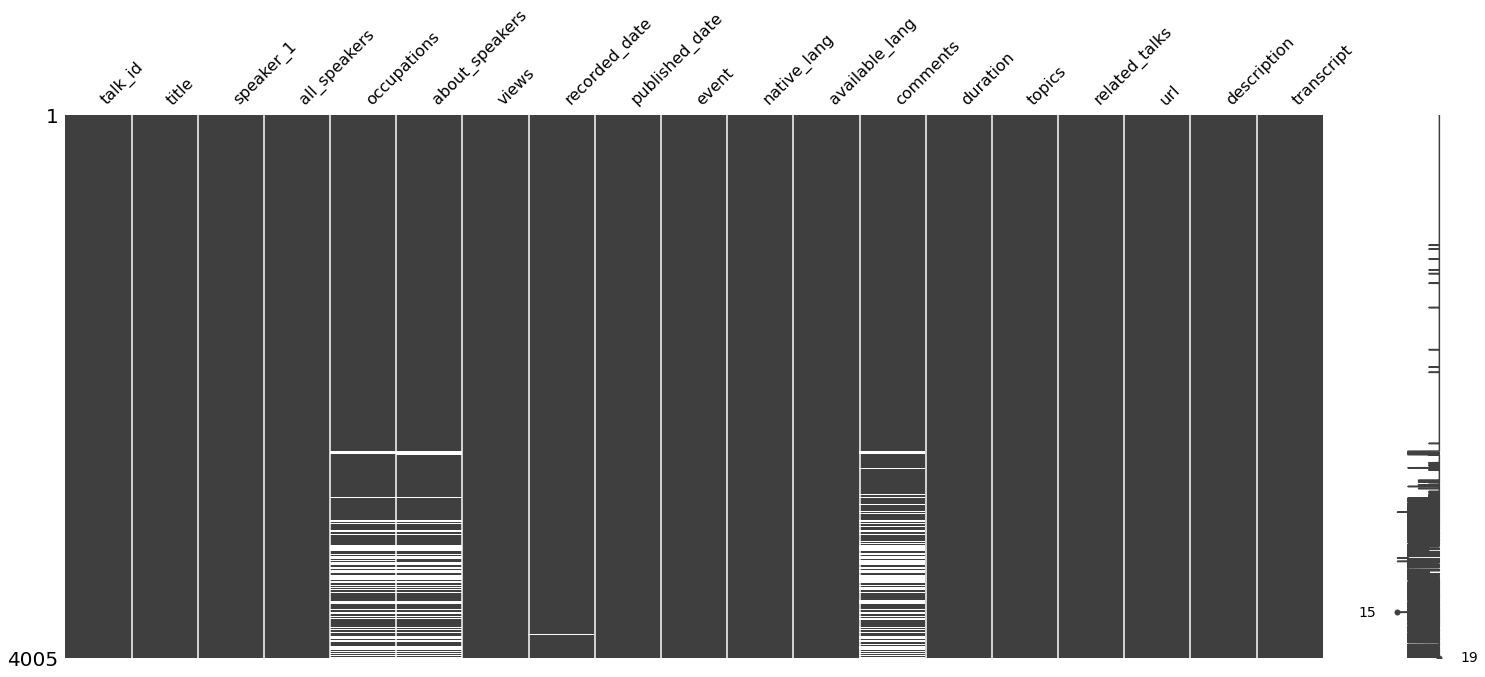

In [588]:
msno.matrix(data)

# Let us take a look at the distribution of dependent variable:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


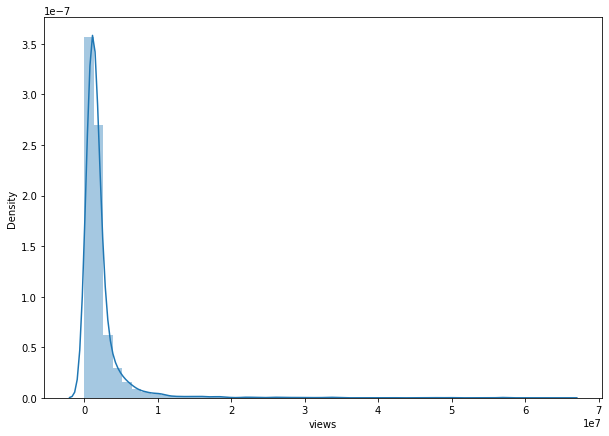

In [589]:
sns.distplot(data['views'])

In [590]:
data['views'].max()

65051954

There are also positvie and negative infinity values on views. Converting them to maximum and nan respectively.

In [591]:
def float_to_int(x):
    if x == float('-inf'):
        return -1
    elif x== float('inf'):
      return x.max()
    return int(x)

In [592]:
data['views']=data['views'].apply(float_to_int)

# Imputing the Nan values :

##Numerical-- KNN nan value imputer

Datasets may have missing values, and this can cause problems for many machine learning algorithms.

As such, it is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation, or imputing for short.

A popular approach to missing data imputation is to use a model to predict the missing values. This requires a model to be created for each input variable that has missing values. Although any one among a range of different models can be used to predict the missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally effective, often referred to as “nearest neighbor imputation.”

In [593]:
numerical_features= ['duration','comments']

In [594]:
from sklearn.preprocessing import StandardScaler

In [595]:
scaler = StandardScaler()
scaler.fit(data[numerical_features])
data[numerical_features] = scaler.transform(data[numerical_features])

In [596]:
#Import libraries
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer()

#fitting the model
imputer.fit(data[numerical_features])

# transform the dataset
data[numerical_features] = imputer.transform(data[numerical_features])

In [597]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        4005 non-null   float64
 13  duration        4005 non-null   float64
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

All the nan values for numerical features is removed.

Transforming scaled values back to original values:

In [598]:
# for inverse transformation
data[numerical_features] = scaler.inverse_transform(data[numerical_features])


In [599]:
data.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


## Categorical features-- nan values are labelled as 'Unkwown'





In [600]:
#categorical features 

categorical_features= ['title','speaker_1','all_speakers','event','native_lang','available_lang','topics','related_talks','url','description','transcript','occupations','about_speakers']

In [601]:
data[categorical_features]=data[categorical_features].fillna('Unknown')

The Recorded date is having null date but in string format. I would like to replace it with first value.

In [602]:
#First value

data['recorded_date'][0]

'2006-02-25'

In [603]:
data['recorded_date']=data['recorded_date'].fillna('2006-02-25')

In [604]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4005 non-null   object 
 4   occupations     4005 non-null   object 
 5   about_speakers  4005 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4005 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        4005 non-null   float64
 13  duration        4005 non-null   float64
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

## I have taken care of all null values.

#Extensive analysis on each of the features.

## I wanna take a look at what are the year,months and days that most of these ted talks have taken place.

### First for the published dates: get the time stamps.

In [605]:
import time

In [606]:
import datetime

In [607]:
data['published_date'] = data['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [608]:
data['published_day'] = data['published_date'].apply(lambda x: x.weekday())
data['published_month'] = data['published_date'].apply(lambda x: x.month)
data['published_year'] = data['published_date'].apply(lambda x: x.year)

## For the recorded date now:

In [609]:
data['recorded_date'] = data['recorded_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [610]:
data['recorded_day'] = data['recorded_date'].apply(lambda x: x.weekday())
data['recorded_month'] = data['recorded_date'].apply(lambda x: x.month)
data['recorded_year'] = data['recorded_date'].apply(lambda x: x.year)

## I also want to keep the number of days it takes between recording and publishing.

In [611]:
data['diff_record_publish']= data['published_date']- data['recorded_date']

In [612]:
data['diff_record_publish'] = pd.to_numeric(data['diff_record_publish'].dt.days, downcast='integer')

## Age of the video:

In [613]:
current_date= datetime.datetime(2021,5,18)

In [614]:
data['age_of_video']= current_date.year- data['published_year']

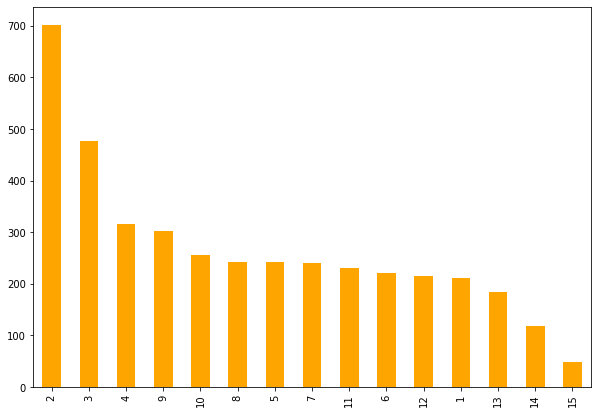

In [615]:
#Plotting the age of most videos

data['age_of_video'].value_counts().sort_values(ascending=False).plot(kind='bar', color= 'orange')

Text(0.5, 1.0, 'Number of days between recording and publishing')

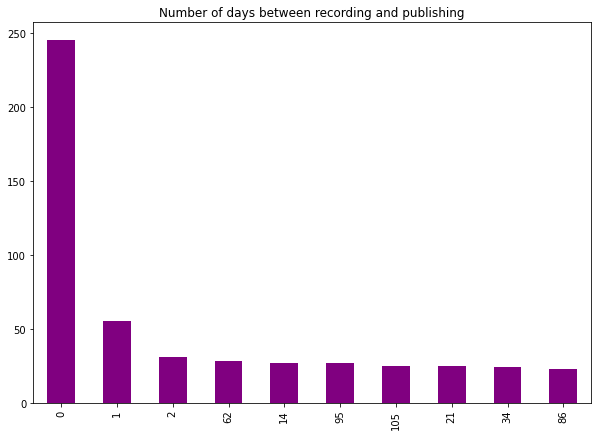

In [616]:
#plotting these to get a better idea

data['diff_record_publish'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='purple')

plt.title('Number of days between recording and publishing')

Determining the relationship of age of video and difference in recorded and published days with the views:




In [617]:
import matplotlib.pyplot as plt


# Find the dependence of views on the difference in recorded and published days:

In [618]:
import seaborn as sns

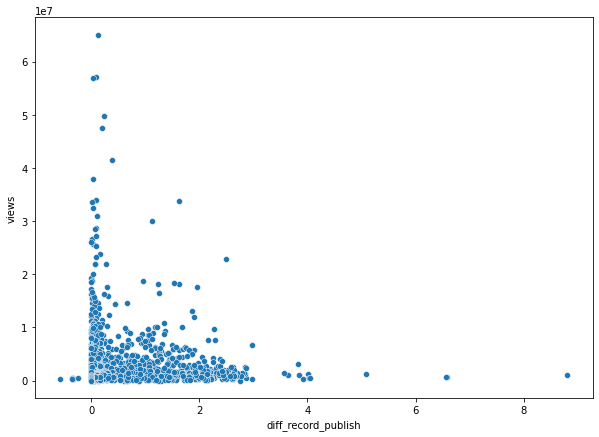

In [619]:
sns.scatterplot(x= data['diff_record_publish']/1000, y=data['views'])

# Find the dependence of views on age_of_videos:

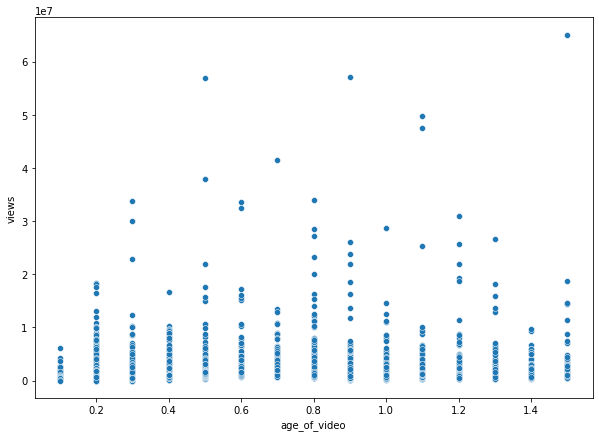

In [620]:
sns.scatterplot(x= data['age_of_video']/10, y=data['views'])

In [621]:
data.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_day,published_month,published_year,recorded_day,recorded_month,recorded_year,diff_record_publish,age_of_video
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1,6,2006,5,2,2006,122,15
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1,6,2006,2,2,2006,125,15
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1,6,2006,4,2,2006,123,15


## I want to determine the most popular days,months and year of publishing:

## Looking for the most popular days for the publishing views.

In [622]:
import matplotlib.pyplot as plt


In [623]:
data['published_day']=data['published_day'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

Text(0.5, 1.0, 'Published Days')

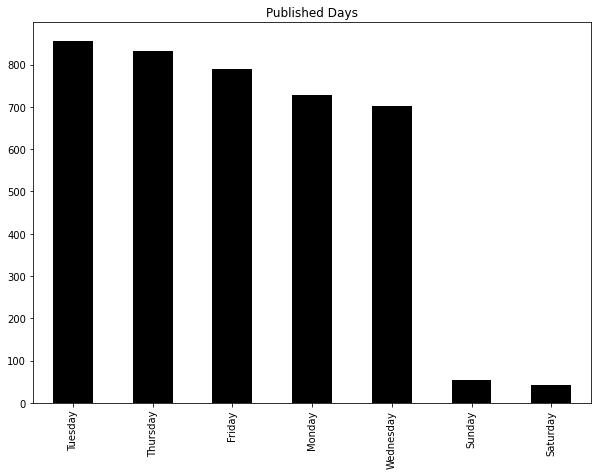

In [624]:
data['published_day'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Published Days')


## Most published months:

In [625]:
data['published_month']=data['published_month'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

Text(0.5, 1.0, 'Published Months')

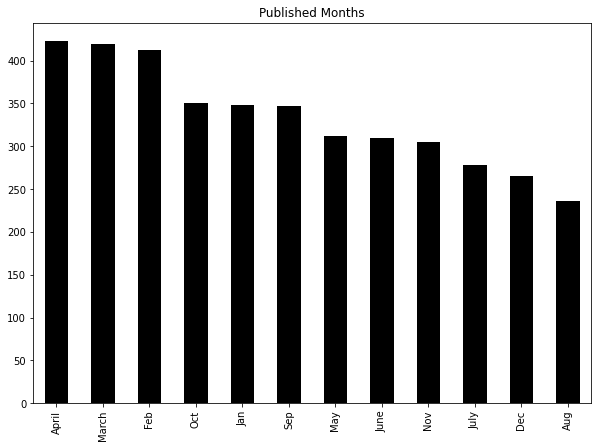

In [626]:
data['published_month'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Published Months')

## Most published year:

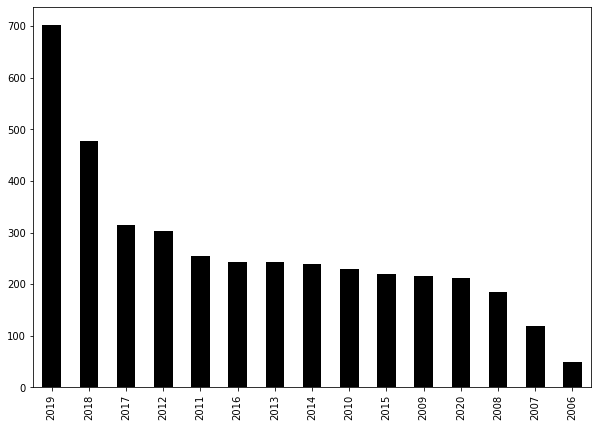

In [627]:
data['published_year'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

# Most popular recorded day, month and year:

## Recorded days distribution:

In [628]:
data['recorded_day']=data['recorded_day'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

Text(0.5, 1.0, 'Recorded Days')

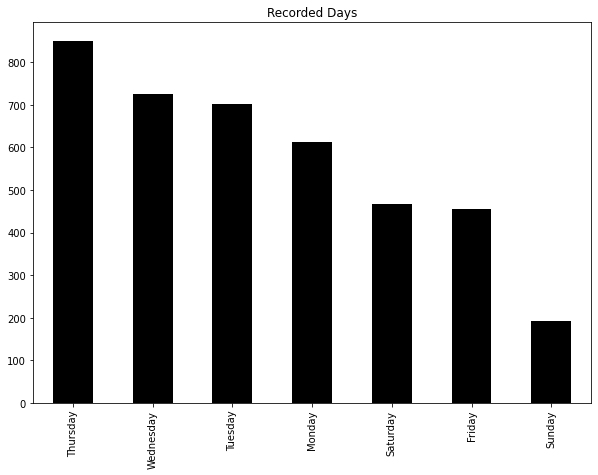

In [629]:
data['recorded_day'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Recorded Days')

## Monthly Recorded distribution:

In [630]:
data['recorded_month']=data['recorded_month'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

Text(0.5, 1.0, 'Recorded Months')

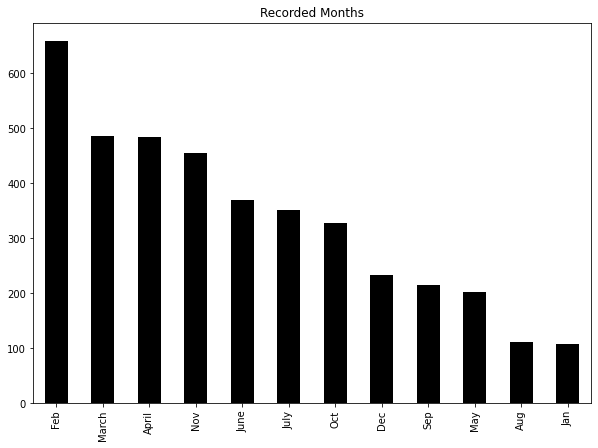

In [631]:
data['recorded_month'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Recorded Months')

## Most recorded year:

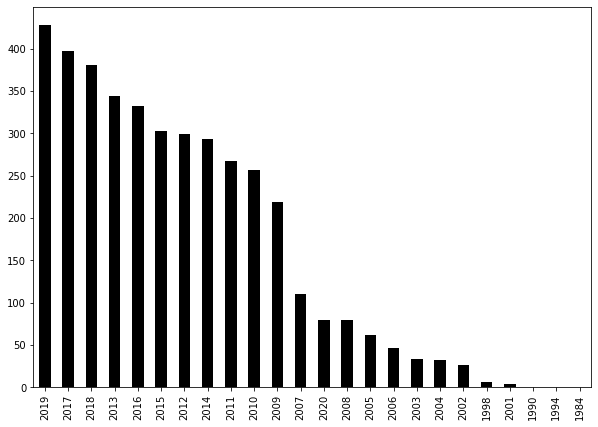

In [632]:
data['recorded_year'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

# Number of languages: 

First convert the string to list:

In [633]:
#Function to use eval function to convert string to list.
def convert_string_to_original_dtype(x):
  return eval(x)

In [634]:

data['available_lang']= data['available_lang'].apply(convert_string_to_original_dtype)

Create another feature that has the count of these languages:

In [635]:
#Function to calculate the count of languages

def length(x):
  return len(x)

In [636]:
data['count_available_lang']= data['available_lang'].apply(length)

Let us see the distribution now:

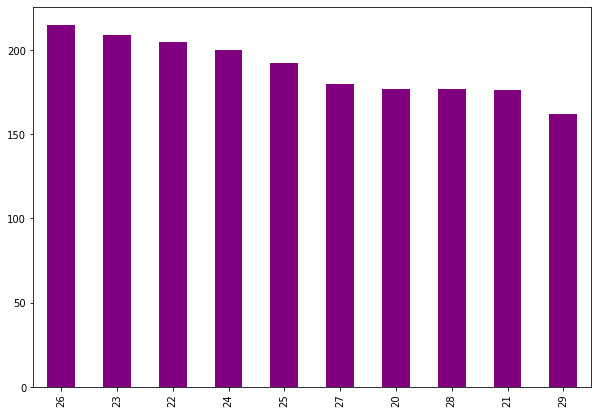

In [637]:
#Distribution of the top 10 counts of languages

data['count_available_lang'].value_counts().sort_values(ascending= False).head(10).plot(kind= 'bar',color= 'purple')


Most ted talks are available in 20-30 languages.

Now that I have the count of languages in a numerical format, I can drop the available languages column.

In [638]:
#dropping the available languages

data.drop(columns='available_lang',inplace= True)

## Native Languages:

In [639]:
#Looking at the unique values first

data['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

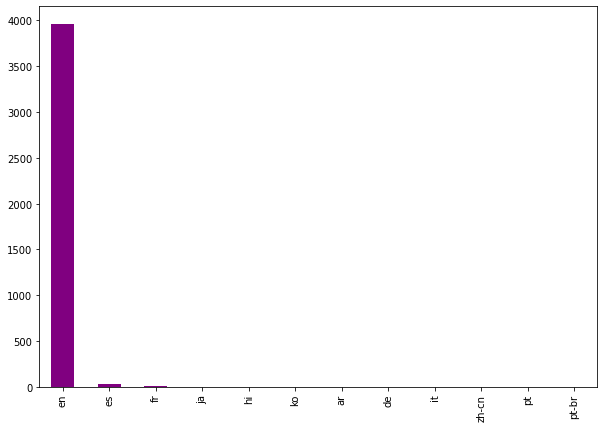

In [640]:
#The distribution:

data['native_lang'].value_counts().plot(kind='bar',color='purple')

Around 3950 are available in English and around only 50 in other languages. This will not result in any difference in the views because of the 5% difference and mostly is a homogenous column.

I will therefore drop this to not further increase the complexity.

In [641]:
data.drop(columns='native_lang',inplace= True)

## Event:

In [642]:
data['event'][0]

'TED2006'

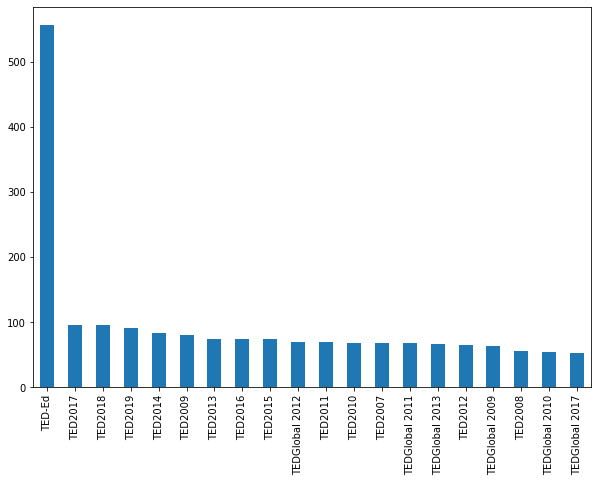

In [643]:
data['event'].value_counts().sort_values(ascending= False).head(20).plot(kind= 'bar')

In [644]:
# initialise all values as 'Other' to assign this category
# to all entries that don't fit into the chosen categories
data['event_category'] = 'Other'

for i in range(len(data)):
    if data['event'][i][0:5]=='TED20':
        data['event_category'][i] = 'TED2000s'
    elif data['event'][i][0:5]=='TED19':
        data['event_category'][i] = 'TED1900s'
    elif data['event'][i][0:4]=='TEDx':
        data['event_category'][i] = "TEDx"
    elif data['event'][i][0:7]=='TED@BCG':
        data['event_category'][i] = 'TED@BCG'
    elif data['event'][i][0:4]=='TED@':
        data['event_category'][i] = "TED@"
    elif data['event'][i][0:8]=='TEDSalon':
        data['event_category'][i] = "TEDSalon"
    elif data['event'][i][0:9]=='TEDGlobal':
        data['event_category'][i] = 'TEDGlobal'
    elif data['event'][i][0:8]=='TEDWomen':
        data['event_category'][i] = 'TEDWomen'
    elif data['event'][i][0:6]=='TEDMED':
        data['event_category'][i] = 'TEDMED'
    elif data['event'][i][0:3]=='TED':
        data['event_category'][i] = 'TEDOther'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is 

In [645]:
data.drop(columns='event',inplace= True)

The Ted-Ed  being the one with the highest medium gives us a idea that knowledge sharing and academics is a very popular kind of medium.

## Number of Speakers:

 This column will help retain the speakers :

In [646]:
data['all_speakers'][0]

"{0: 'Al Gore'}"

Function for converting:

In [647]:
#This function converts string to dict:
def convert_string_to_dict(x):
  if x== 'Unknown':
    pass
  else:
    return eval(x)

In [648]:
data['all_speakers']=data['all_speakers'].apply(convert_string_to_dict)

In [649]:
data['all_speakers'][0]

{0: 'Al Gore'}

Next I want to get speakers in a series format and not in a dictionary format. And the count of speakers in each talk.

In [650]:
len(data['all_speakers'][0])

1

In [651]:
#function to obtain the count of speakers

def get_count_speakers(x):
  try:
    return len(x)
  except TypeError:
    return 0


In [652]:
data['count_of_speakers']= data['all_speakers'].apply(get_count_speakers)

Text(0.5, 1.0, 'Count of Speakers')

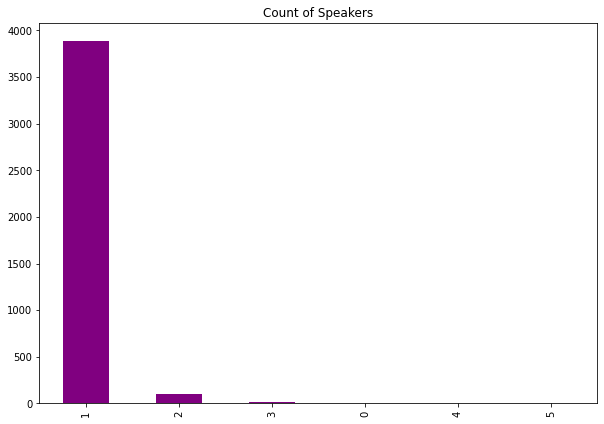

In [653]:
data['count_of_speakers'].value_counts().plot(kind='bar',color='purple')

plt.title('Count of Speakers')

Except a few, most have 1 speaker in the talks.

In [654]:
#function to get a separate column for the speakers only

def get_speakers(x):
  speakers=[]
  try:
    for key,value in x.items():
      speakers.append(value)
  except AttributeError:
    speakers.append('Unknown')
  return speakers


In [655]:
data['Speakers']= data['all_speakers'].apply(get_speakers)

Let us see who are the speakers :

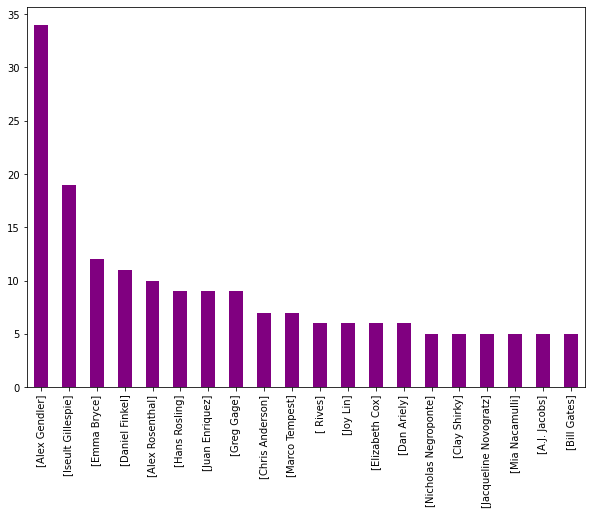

In [656]:
data['Speakers'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',color='purple')

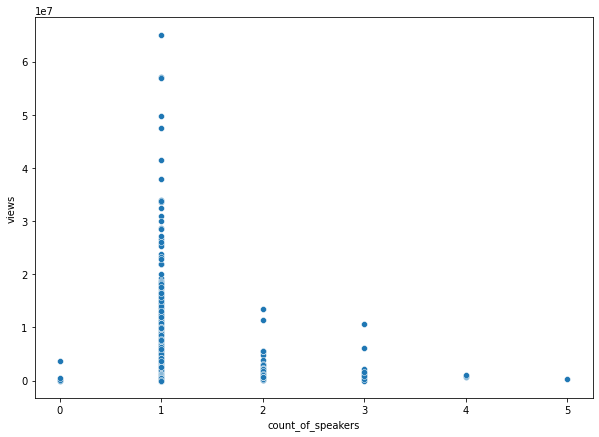

In [657]:
sns.scatterplot(x= data['count_of_speakers'], y=data['views'])

Since the number of speakers is not at all related to views.

We can infer from here that, one speaker is enough for views if he popular enough and not needed for two speakers

As Speakers_1 is very similar to all_Speakers

In [658]:
data.drop(columns=['all_speakers','count_of_speakers','Speakers'],inplace= True)

## Speaker 1:

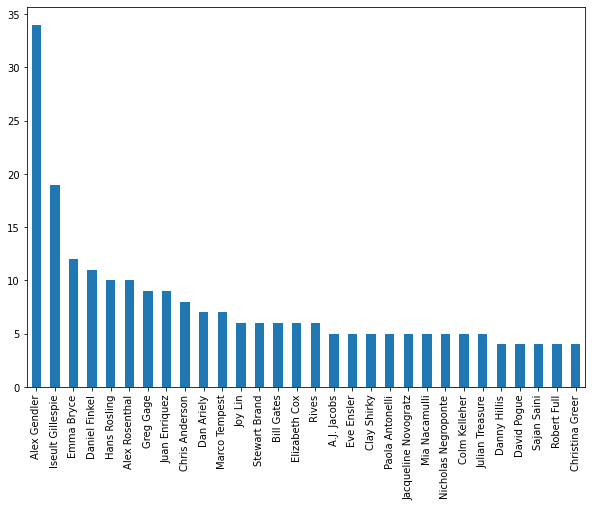

In [659]:
data['speaker_1'].value_counts().sort_values(ascending= False).head(30).plot(kind='bar')

## Occupation:

In [660]:
data['occupations'][0]

"{0: ['climate advocate']}"

In [661]:

data['occupations']=data['occupations'].apply(convert_string_to_dict)

In [662]:
#Function to convert list to string
def list_to_string(x):
  for item in x:
    return item

In [663]:
#Function to obtain occupation 

def get_occupation(x):
  try:
    for key,value in x.items():
      return value
  except AttributeError:
    return 'Unknown'



In [664]:
data['occupation']= data['occupations'].apply(get_occupation)

In [665]:

data['occupation'][0]

['climate advocate']

In [666]:
data['occupation']= data['occupation'].apply(list_to_string)

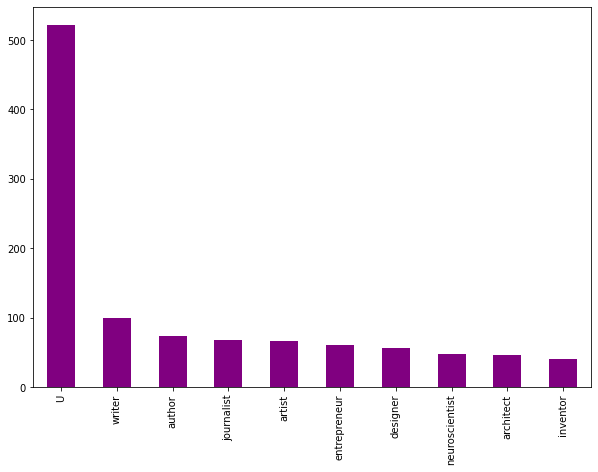

In [667]:
#Plot the occupations plot

data['occupation'].value_counts().head(10).plot(kind='bar',color= 'purple')

A lot of these values are given as 'U'. Let me understand these values first.

In [668]:
data[data['occupation']=='U'].head(3)

,talk_id,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,comments,duration,topics,related_talks,url,description,transcript,published_day,published_month,published_year,recorded_day,recorded_month,recorded_year,diff_record_publish,age_of_video,count_available_lang,event_category,occupation
1142,1407,I am a pirate,Rick Falkvinge,None,"{0: 'Rick Falkvinge, didn’t plan on becoming a...",220557,2013-10-31,2012-04-01,128.0,1097.0,"['Internet', 'TEDx', 'global issues', 'politic...","{1329: 'Why SOPA is a bad idea', 871: 'Re-exam...",https://www.ted.com/talks/rick_falkvinge_i_am_...,"The Pirate Party fights for transparency, anon...",Thank y'all! This is going to be a motivationa...,Sunday,April,2012,Thursday,Oct,2013,-578,9,16,TEDx,U
1170,1436,Tracking our online trackers,Gary Kovacs,None,{0: 'Gary Kovacs is a technologist and the for...,2226169,2012-02-29,2012-05-03,260.0,399.0,"['Internet', 'advertising', 'business', 'priva...","{1370: 'All your devices can be hacked', 788: ...",https://www.ted.com/talks/gary_kovacs_tracking...,"As you surf the Web, information is being coll...","I don't know why, but I'm continually amazed t...",Thursday,May,2012,Wednesday,Feb,2012,64,9,32,TED2000s,U
1241,1515,Image recognition that triggers augmented reality,Matt Mills,None,"{0: 'Matt Mills comes from Aurasma, a startup ...",2677855,2012-06-26,2012-07-19,140.0,484.0,"['demo', 'design', 'interface design', 'scienc...","{481: 'Meet the SixthSense interaction', 1411:...",https://www.ted.com/talks/matt_mills_image_rec...,Matt Mills and Tamara Roukaerts demonstrate Au...,So wouldn't it be amazing if our phones could ...,Thursday,July,2012,Tuesday,June,2012,23,9,26,TEDGlobal,U


Most of the U values are given for None type occupations. I will be changing them to not available.

In [669]:
data['occupation']=data['occupation'].replace(['U'],'Not available')

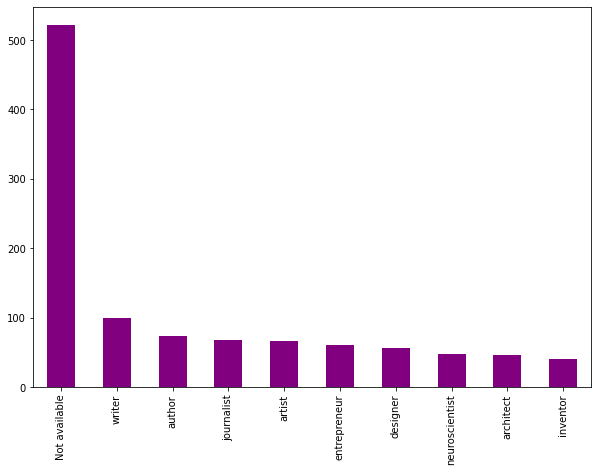

In [670]:
data['occupation'].value_counts().head(10).plot(kind='bar',color= 'purple')

In [671]:
data.drop(columns='occupations',inplace= True)

## Number of Tags:

In [672]:
#Find the number of tags

def no_of_tags(x):
  return len(x)

In [673]:
data['Num_tags']= data['topics'].apply(no_of_tags)

## New feature: Related Talks

In [674]:
#applying eval function on available_lang column
data['related_talks'] = data.apply(lambda row: eval(row['related_talks']), axis=1)

In [675]:
#defining a new feature called related_views
data['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(data)):
      if (data.loc[i,'talk_id']) in id_list:
        temp+=data.loc[i,'views']

    data.loc[index,'related_views']=temp//6

In [676]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   talk_id               4005 non-null   int64         
 1   title                 4005 non-null   object        
 2   speaker_1             4005 non-null   object        
 3   about_speakers        4005 non-null   object        
 4   views                 4005 non-null   int64         
 5   recorded_date         4005 non-null   datetime64[ns]
 6   published_date        4005 non-null   datetime64[ns]
 7   comments              4005 non-null   float64       
 8   duration              4005 non-null   float64       
 9   topics                4005 non-null   object        
 10  related_talks         4005 non-null   object        
 11  url                   4005 non-null   object        
 12  description           4005 non-null   object        
 13  transcript        

# Let us visualize the most spoken about topics in the Ted talks :

In [677]:
from wordcloud import WordCloud,ImageColorGenerator

In [678]:
text = " ".join(topic for topic in data.topics.astype(str))

In [679]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

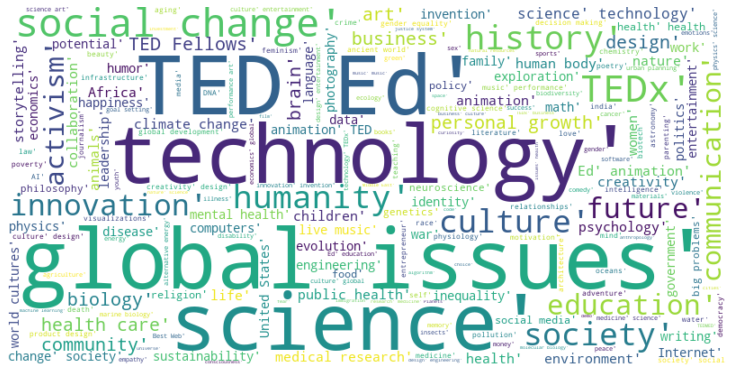

In [680]:
plt.axis("off")


plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation='bilinear')

plt.savefig('gdrive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/topics_cloud.png', dpi=300, bbox_inches='tight')

plt.show()

# Columns to drop:

In [681]:
data.drop(columns='topics',inplace= True)

In [682]:
data.drop(columns=['url','talk_id','title','about_speakers','description','related_talks','recorded_date','published_date'],inplace= True)

In [683]:
data.drop(columns=['recorded_month','recorded_year'],inplace= True)

In [684]:
data.drop(columns=['published_day','published_year'],inplace= True)

In [685]:
data.drop(columns= 'recorded_day',inplace= True)

In [686]:
data.drop(columns='published_month',inplace= True)

In [687]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   speaker_1             4005 non-null   object 
 1   views                 4005 non-null   int64  
 2   comments              4005 non-null   float64
 3   duration              4005 non-null   float64
 4   transcript            4005 non-null   object 
 5   diff_record_publish   4005 non-null   int16  
 6   age_of_video          4005 non-null   int64  
 7   count_available_lang  4005 non-null   int64  
 8   event_category        4005 non-null   object 
 9   occupation            4005 non-null   object 
 10  Num_tags              4005 non-null   int64  
 11  related_views         4005 non-null   int64  
dtypes: float64(2), int16(1), int64(5), object(4)
memory usage: 352.1+ KB


## Target Encoding:

In [688]:
categorical_variables= ['event_category','occupation','speaker_1']

In [689]:
!pip install category_encoders
import category_encoders as ce

In [690]:
encoder=ce.TargetEncoder()
data[categorical_variables]=encoder.fit_transform(data[categorical_variables],data['views'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## Hypothesis :

1. Medium duration will have maximum views

2. Higher comments will have higher views

3. More topics should have more views

4. Ted'Ed event should have had more views

5. Older the video more the views.

Let us see if we are correct


Text(0.5, 1.0, 'Duration vs Views')

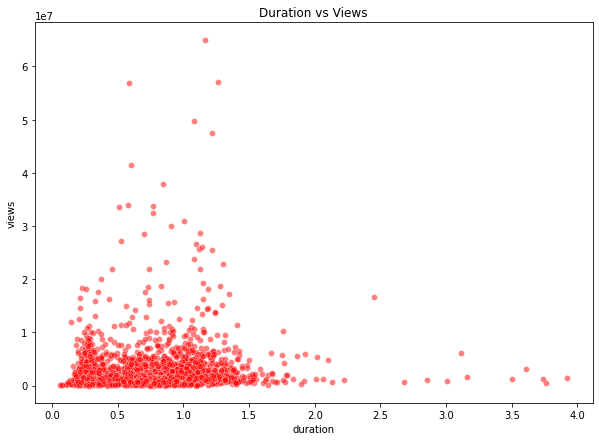

In [691]:

#1. Medium duration will have maximum views

sns.scatterplot(x=(data['duration'])/1000,y= data['views'], color= 'r',alpha= 0.5)

plt.title('Duration vs Views')

My hypothesis was correct.

Text(0.5, 1.0, 'Comments vs Views')

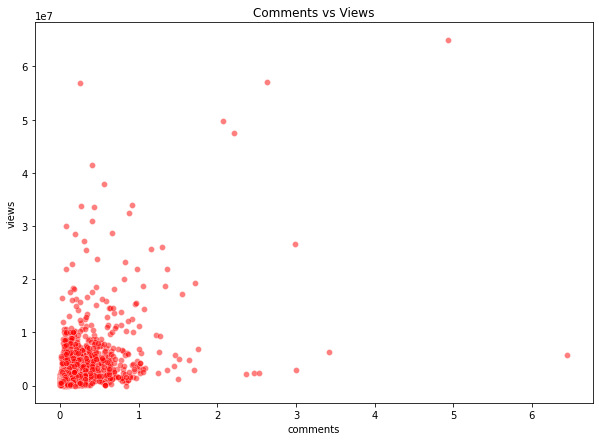

In [692]:
#2. Higher comments will have higher views

sns.scatterplot(x=(data['comments'])/1000,y= data['views'], color= 'r',alpha= 0.5)

plt.title('Comments vs Views')

This is mostly true. And higher comments have for low values of views but isn't true for a lot of the data.

Text(0.5, 1.0, 'Number of tags vs Views')

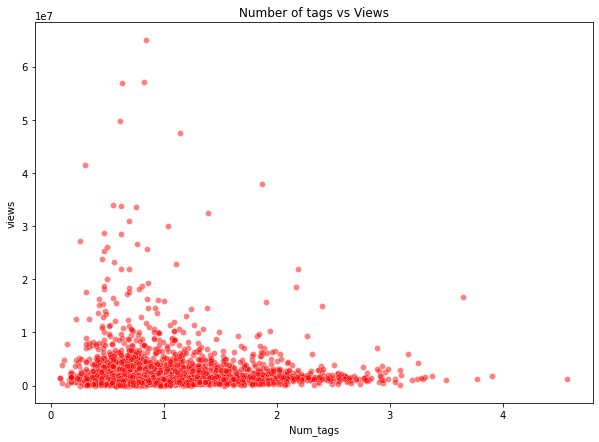

In [693]:
#3. More topics have more views

sns.scatterplot(x=(data['Num_tags'])/100,y= data['views'], color= 'r',alpha= 0.5)

plt.title('Number of tags vs Views')

Number of topics doesn't effect the views.

Text(0.5, 1.0, 'Event vs Views')

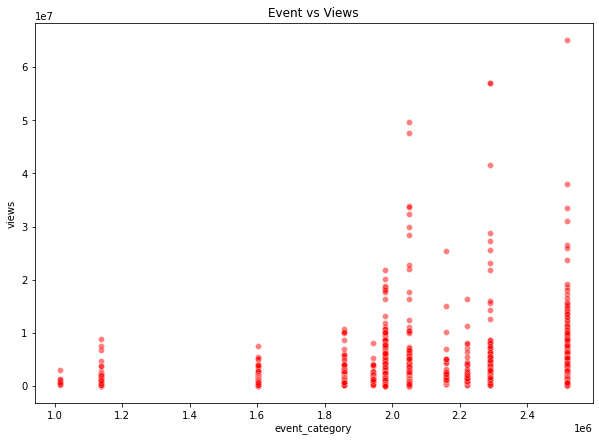

In [694]:
#4. Ted'Ed event should have had more views

sns.scatterplot(x=(data['event_category']),y= data['views'], color= 'r',alpha= 0.5)

plt.title('Event vs Views')

This hypothesis is wrong too.

Text(0.5, 1.0, 'Age of video vs Views')

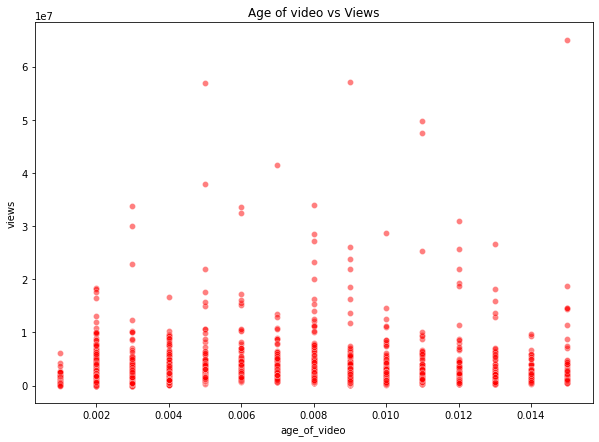

In [695]:
#4.Older videos should have more views

sns.scatterplot(x=(data['age_of_video'])/1000,y= data['views'], color= 'r',alpha= 0.5)

plt.title('Age of video vs Views')

This hypothesis too is wrong.

## Since most of the important features do not have a linear relationship with the views I will be directly applying non parametric algorithms like Random Forest and Decision Trees.

## Correlation between variables- 

In [696]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   speaker_1             4005 non-null   float64
 1   views                 4005 non-null   int64  
 2   comments              4005 non-null   float64
 3   duration              4005 non-null   float64
 4   transcript            4005 non-null   object 
 5   diff_record_publish   4005 non-null   int16  
 6   age_of_video          4005 non-null   int64  
 7   count_available_lang  4005 non-null   int64  
 8   event_category        4005 non-null   float64
 9   occupation            4005 non-null   float64
 10  Num_tags              4005 non-null   int64  
 11  related_views         4005 non-null   int64  
dtypes: float64(5), int16(1), int64(5), object(1)
memory usage: 352.1+ KB


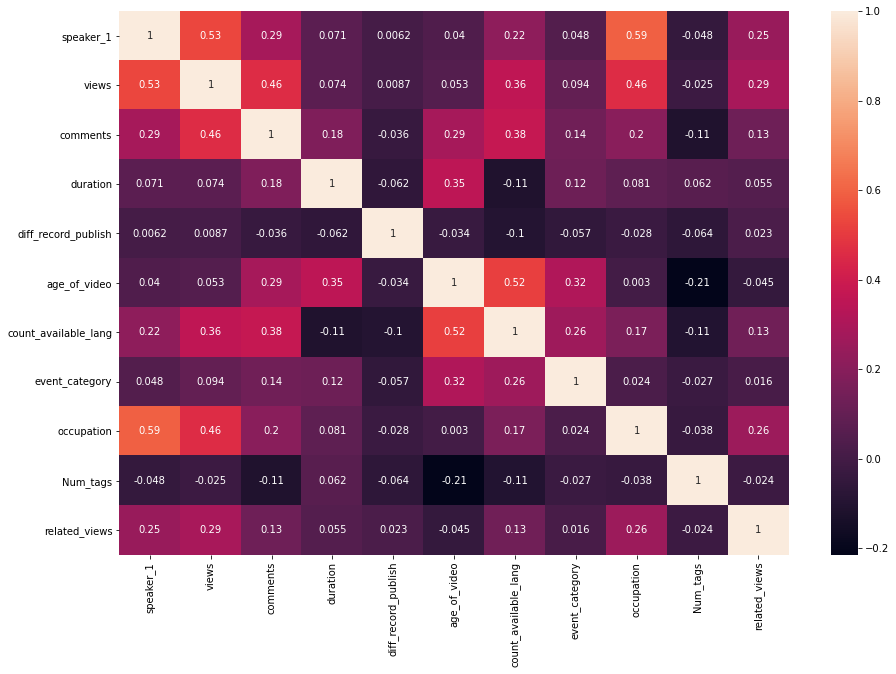

In [697]:
plt.rcParams["figure.figsize"] = (15,10)

sns.heatmap(data.corr(),annot= True)

# Feature selection by f-regression:

This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

This can only be used for numerical features and not string data.

In [698]:
data['duration']= data['duration'].astype('float64')

In [699]:
data.columns

Index(['speaker_1', 'views', 'comments', 'duration', 'transcript',
       'diff_record_publish', 'age_of_video', 'count_available_lang',
       'event_category', 'occupation', 'Num_tags', 'related_views'],
      dtype='object')

In [700]:
num_var=['speaker_1','comments', 'duration',
        'age_of_video', 'count_available_lang',
       'event_category', 'occupation', 'Num_tags', 'related_views']

In [701]:
dependent_variable= data['views']

In [704]:
numerical_features=data[num_var]

In [702]:
#import libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [705]:
f_scores = f_regression(numerical_features, dependent_variable)
f_scores

(array([1598.77930474, 1085.38829224,   21.82729964,   11.48088069,
         579.87593365,   35.71342113, 1081.57975756,    2.41993758,
         375.23269649]),
 array([1.87498525e-294, 7.76636037e-211, 3.08124671e-006, 7.09949633e-004,
        9.03081853e-120, 2.48508789e-009, 3.48069290e-210, 1.19878756e-001,
        5.60016018e-080]))

In [706]:
#The first array consists of f scores that we need

f_scores_series= pd.Series(f_scores[0],index= numerical_features.columns)

Text(0.5, 1.0, 'F- scores for numerical features')

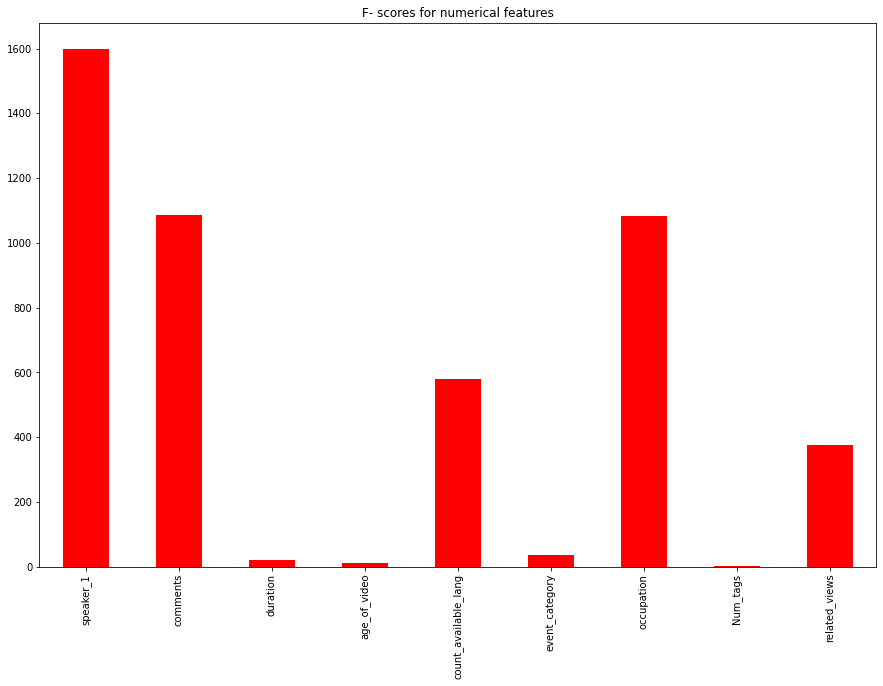

In [707]:
f_scores_series.plot(kind='bar',color='red')

plt.title('F- scores for numerical features')

In [708]:
data.drop(columns=['diff_record_publish'],inplace= True)

In [709]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   speaker_1             4005 non-null   float64
 1   views                 4005 non-null   int64  
 2   comments              4005 non-null   float64
 3   duration              4005 non-null   float64
 4   transcript            4005 non-null   object 
 5   age_of_video          4005 non-null   int64  
 6   count_available_lang  4005 non-null   int64  
 7   event_category        4005 non-null   float64
 8   occupation            4005 non-null   float64
 9   Num_tags              4005 non-null   int64  
 10  related_views         4005 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 344.3+ KB


Remove the columns with very low F-score.

In [710]:
numerical_features.drop(columns='event_category',inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [711]:
numerical_features.drop(columns=['age_of_video','Num_tags','duration'],inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
numerical_features.drop(columns=['diff_record_publish'],inplace= True)

#Outlier Treatement:

In [713]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

In [714]:
IQR = Q3 - Q1

In [715]:
#Treat the outlier
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Num_tags                 143
age_of_video               0
comments                 290
count_available_lang     121
duration                  21
event_category           153
occupation               560
related_views            300
speaker_1               1155
transcript                 0
views                    393
dtype: int64

In [716]:
# Replacing outliers with extreme values

for i in ['comments','Num_tags','duration','event_category','related_views','views','speaker_1']:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1

  data[i]=np.where(data[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(data[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),data[i]))

In [718]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   speaker_1             4005 non-null   float64
 1   views                 4005 non-null   float64
 2   comments              4005 non-null   float64
 3   duration              4005 non-null   float64
 4   transcript            4005 non-null   object 
 5   age_of_video          4005 non-null   int64  
 6   count_available_lang  4005 non-null   int64  
 7   event_category        4005 non-null   float64
 8   occupation            4005 non-null   float64
 9   Num_tags              4005 non-null   float64
 10  related_views         4005 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 344.3+ KB


In [719]:
numerical_features= data[['speaker_1','comments', 'duration',
        'age_of_video', 'count_available_lang',
       'event_category', 'occupation', 'Num_tags', 'related_views']]

In [720]:
X= numerical_features

Y= dependent_variable

In [721]:
x.shape

(4005, 6)

In [722]:
x= X.values
y= Y.values

In [723]:
y.shape

(4005,)

In [724]:
y= y.reshape(-1,1)

In [725]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=121212)

# Checking in a simple XGBoost Baseline model with hyper paramater tuning first:

In [726]:
from xgboost import XGBRegressor

In [727]:
from sklearn.model_selection import RandomizedSearchCV

In [728]:
#XGBoost Regressor

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]


#Learning rate
learning_rate=[0.01,0.05,0.1]

#L2 Regularization
reg_lambda=[0.1,0.5,1]

#L1 Regularization
reg_alpha= [0,0.01]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'gamma':gamma,
              'learning_rate':learning_rate,
              'reg_alpha':reg_alpha,
              'reg_lambda':reg_lambda}

# Create an instance of the XGBoost
xgb_model = XGBRegressor()

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)


xgb_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] reg_lambda=0.1, reg_alpha=0.01, n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=6, learning_rate=0.01, gamma=0 
[16:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_lambda=0.1, reg_alpha=0.01, n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=6, learning_rate=0.01, gamma=0, total=   0.2s
[CV] reg_lambda=0.1, reg_alpha=0.01, n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=6, learning_rate=0.01, gamma=0 
[16:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  reg_lambda=0.1, reg_alpha=0.01, n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=6, learning_rate=0.01, gamma=0, total=   0.2s
[CV] reg_lambda=0.1, reg_alpha=0.01, n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=6, learning_rate=0.01, gamma=0 
[16:45:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.1, reg_alpha=0.01, n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=6, learning_rate=0.01, gamma=0, total=   0.2s
[CV] reg_lambda=0.1, reg_alpha=0.01, n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=6, learning_rate=0.01, gamma=0 
[16:45:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.1, reg_alpha=0.01, n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=6, learning_rate=0.01, gamma=0, total=   0.2s
[

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': [0, 0.01, 0.1],
                                        'learning_rate': [0.01

In [729]:
#The best esitmators
xgb_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, min_samples_leaf=40,
             min_samples_split=150, missing=None, n_estimators=80, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=0.5, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [730]:
#Building optimal model on the best estimators
xgb_optimal_model = xgb_random.best_estimator_

In [731]:
# make predictions for test data
y_hat = xgb_optimal_model.predict(X_test)

In [732]:
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')

r_sqr value for train: 0.7497719827960678


Scores:

In [733]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [734]:
r_squared= r2_score(y_test,y_hat)

In [735]:
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(f'The R_Squared for XGBoost is {r_squared} for train and adjusted R_Squared is {adjusted_r_squared}')


The R_Squared for XGBoost is 0.5058723498909696 for train and adjusted R_Squared is 0.5047591712048667


In [ ]:
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

In [736]:
mean_absolute_scaled_error(y_test, y_hat, y_train)

0.8999508014410281

In [ ]:
mase=[]

In [ ]:
mase.append(mean_absolute_scaled_error(y_test,y_hat,y_train))


In [ ]:
mse= mean_squared_error(y_test,y_hat)

In [ ]:
import math

In [ ]:
rmse=[]

mae= []

model=[]


In [ ]:
y_train.mean()

In [ ]:
rmse.append(math.sqrt(mse))

In [737]:
print(f'The Root Mean Squared Error for XGBoost is: {math.sqrt(mean_squared_error(y_test,y_hat))}')

The Root Mean Squared Error for XGBoost is: 2535835.146298032


In [738]:
#Training error
math.sqrt(mean_squared_error(y_train,xgb_optimal_model.predict(X_train)))

1699203.7033188448

In [ ]:
mae.append(mean_absolute_error(y_test,y_hat))

In [739]:
print(f'The mean absolute error for XGBoost is: {mean_absolute_error(y_test,y_hat)}')

The mean absolute error for XGBoost is: 1105267.2422576721


In [ ]:
model.append('XGBoost')

# Random Forest:

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Random Forest Regressor

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForest
rf_model = RandomForestRegressor()

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)


rf_random.fit(X_train,y_train)

In [ ]:
#The best esitmators
rf_random.best_estimator_

In [ ]:
#Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_

In [ ]:
# make predictions for test data
y_hat_r = rf_optimal_model.predict(X_test)

In [ ]:
r_squared_rf=r2_score(y_test,y_hat_r)

In [ ]:
#Calculate Adjusted R-sqaured
adjusted_r_squared_rf = 1 - (1-r_squared_rf)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(f'The R_Squared for Random Forest is {r_squared_rf} and adjusted R_Squared is {adjusted_r_squared_rf}')

In [ ]:
rmse.append (math.sqrt(mean_squared_error(y_test,y_hat_r)))

In [ ]:
print(f'The Root Mean Squared Error for Random Forest is: {math.sqrt(mean_squared_error(y_test,y_hat_r))}')

In [ ]:
#Training error
math.sqrt(mean_squared_error(y_train,rf_optimal_model.predict(X_train)))

In [ ]:
mae.append(mean_absolute_error(y_test,y_hat_r))


In [ ]:
print(f'The mean absolute error for Random Forest is: {mean_absolute_error(y_test,y_hat_r)}')

In [ ]:
model.append('Random Forest')

## Comapring the results of each of the models:

I am only considering MAE as a metric because my data is not normally distributed for most variables.

##The Error is quite high. Let us see if we can apply topic modelling on the Transcript column to get some insights on the soft clusters.

In [ ]:
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [ ]:
data['transcript'][0]

## Word Preprocessing:

In [ ]:
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [ ]:
text= data['transcript']

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(nb_words="MAX_NB_WORDS")
tokenizer.fit_on_texts(data['transcript'])

# Word Normalizing:

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

data['transcript'] = normalize(data['transcript'])
print(data['transcript'][0])

# By NMF and TFIDF Vectorizer:

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.25,min_df=5)
doc_term_matrix = tfidf_vectorizer.fit_transform(data['transcript'].values.astype('U'))

In [ ]:
#Probability matrix of the probabilities of words

from sklearn.decomposition import NMF

nmf = NMF(n_components=7, random_state=42)
nmf.fit(doc_term_matrix )

In [ ]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

In [742]:
topic_values = nmf.transform(doc_term_matrix)
data['Topic_Cluster'] = topic_values.argmax(axis=1)
data.head(2)

,speaker_1,views,comments,duration,transcript,age_of_video,count_available_lang,event_category,occupation,Num_tags,related_views,Topic_Cluster
0,2.148006e+06,3523392.0,272.0,977.0,"Thank you so much, Chris. And it's truly a gre...",15,43,2.518750e+06,1.881731e+06,134.0,1659584.0,4
1,2.148006e+06,4009671.5,396.0,1190.0,"About 10 years ago, I took on the task to teac...",15,49,2.518750e+06,3.986929e+06,138.0,1573950.0,4


In [743]:
data_copy= data.copy()

In [744]:
data['Topic_Cluster'].unique()

array([4, 0, 2, 6, 5, 1, 3])

In [745]:
# Replace the the values

replace_values={0:'Technology',1:'Science',2:'Music',3:'Health',4:'International Affairs',5:'Social Issues',6:'Mental Health'}

data['Topic_Cluster']= data['Topic_Cluster'].map(replace_values)

In [746]:
data['Topic_Cluster'].unique()

array(['International Affairs', 'Technology', 'Music', 'Mental Health',
       'Social Issues', 'Science', 'Health'], dtype=object)

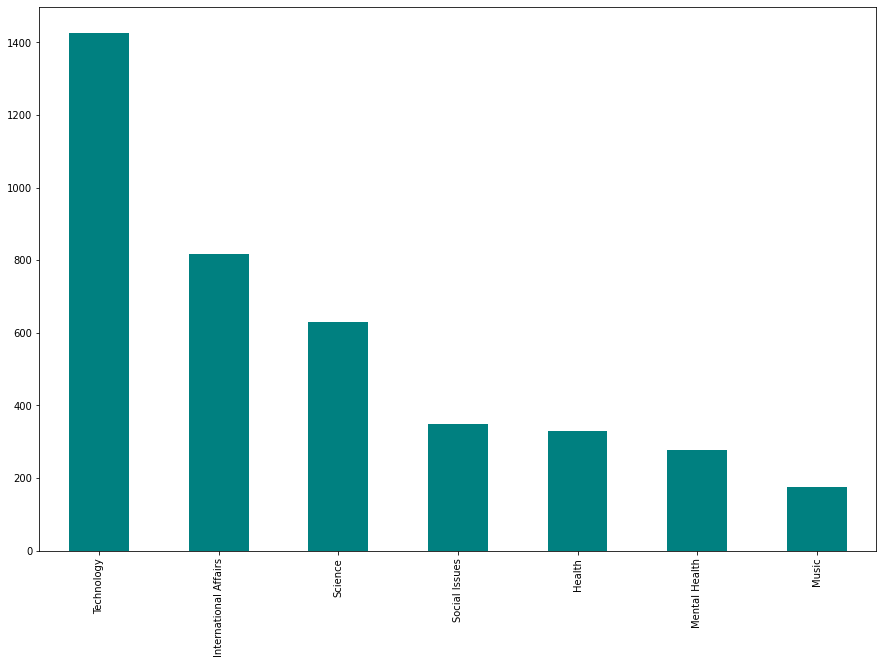

In [747]:
#checking the count of each of these topics

data['Topic_Cluster'].value_counts().sort_values(ascending= False).plot(kind='bar',color='teal')

## Hypothesis- Technology should have maximum views

In [ ]:
data[data['views']== data['views'].max()]

My hypothesis was correct. Topics cluster is a very important feature.

In [751]:
# Target Encoding

encoder=ce.TargetEncoder()
data['Topic_Cluster']=encoder.fit_transform(data['Topic_Cluster'],data['views'])


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
data.columns

In [ ]:
numerical_features.columns

In [740]:
num_variables= ['speaker_1', 'comments', 'count_available_lang', 'occupation',
       'related_views','Topic_Cluster']

In [753]:
numerical_features_with_topics= data[num_variables]

Getting the numerical features:

In [761]:
numerical_features_with_topics.head(2)

,speaker_1,comments,count_available_lang,occupation,related_views,Topic_Cluster
0,2.148006e+06,272.0,43,1.881731e+06,1659584.0,1.449011e+06
1,2.148006e+06,396.0,49,3.986929e+06,1573950.0,1.449011e+06


In [758]:
# Replacing outliers with extreme values
Q1 = data['Topic_Cluster'].quantile(0.25)
Q3 = data['Topic_Cluster'].quantile(0.75)
IQR = Q3 - Q1

data['Topic_Cluster']=np.where(data['Topic_Cluster']<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(data['Topic_Cluster']>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),data['Topic_Cluster']))

In [762]:
f_scores = f_regression(numerical_features_with_topics, dependent_variable)
f_scores

(array([5.69335536e-16, 5.43380584e+02, 5.79875934e+02, 1.08157976e+03,
        3.61215189e+02, 1.03366725e+02]),
 array([1.00000000e+000, 8.27730793e-113, 9.03081853e-120, 3.48069290e-210,
        3.49287547e-077, 5.43580749e-024]))

In [763]:
#The first array consists of f_scores that we need

f_scores_series= pd.Series(f_scores[0],index= numerical_features_with_topics.columns)

Text(0.5, 1.0, 'F- scores for numerical features')

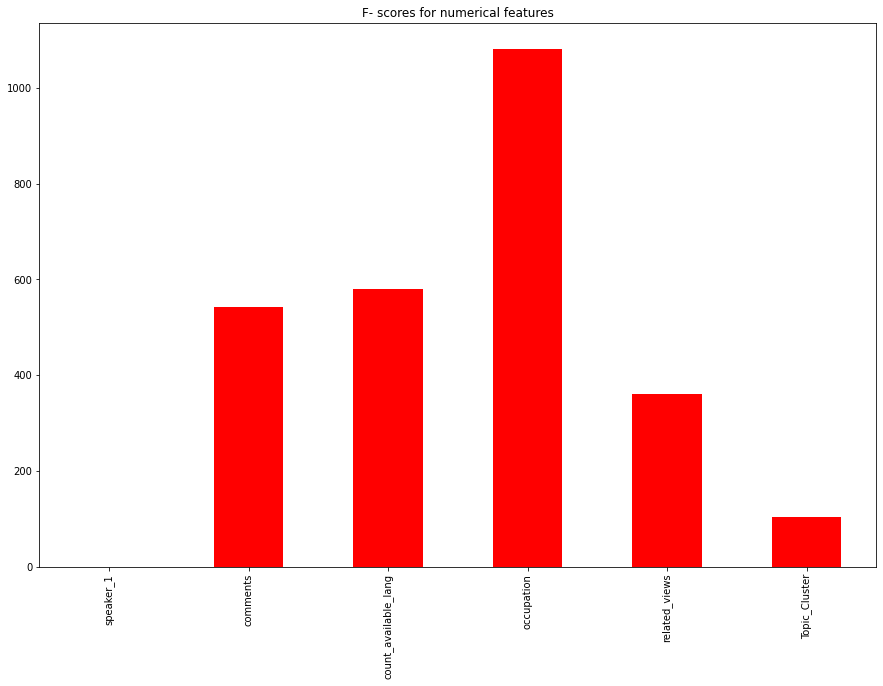

In [764]:
f_scores_series.plot(kind='bar',color='red')

plt.title('F- scores for numerical features')

In [766]:
numerical_features_with_topics.drop(columns='speaker_1',inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [767]:
#Defining X,Y and Train test variables:

In [768]:
X= numerical_features_with_topics

Y= dependent_variable

In [769]:
x= X.values
y= Y.values

In [770]:
y= y.reshape(-1,1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


## XGBoost Regressor with tuning and regularization:

In [771]:
from xgboost import XGBRegressor

In [772]:
from sklearn.model_selection import RandomizedSearchCV

In [773]:
#XGBoost Regressor

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]


#gamma
gamma=[0,0.01,0.1]

#Learning rate
learning_rate=[0.01,0.05,0.1]

#L2 Regularization
reg_lambda=[0.1,0.5,1]

#L1 Regularization
reg_alpha= [0,0.01]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'gamma':gamma,
              'learning_rate':learning_rate,
              'reg_alpha':reg_alpha,
              'reg_lambda':reg_lambda}

# Create an instance of the XGBoost
xgb_model = XGBRegressor()

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)


xgb_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] reg_lambda=0.1, reg_alpha=0, n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, learning_rate=0.1, gamma=0.01 
[16:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.1, reg_alpha=0, n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, learning_rate=0.1, gamma=0.01, total=   0.1s
[CV] reg_lambda=0.1, reg_alpha=0, n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, learning_rate=0.1, gamma=0.01 
[16:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  reg_lambda=0.1, reg_alpha=0, n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, learning_rate=0.1, gamma=0.01, total=   0.1s
[CV] reg_lambda=0.1, reg_alpha=0, n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, learning_rate=0.1, gamma=0.01 
[16:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.1, reg_alpha=0, n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, learning_rate=0.1, gamma=0.01, total=   0.1s
[CV] reg_lambda=0.1, reg_alpha=0, n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, learning_rate=0.1, gamma=0.01 
[16:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.1, reg_alpha=0, n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, learning_rate=0.1, gamma=0.01, total=   0.1s
[CV] r

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': [0, 0.01, 0.1],
                                        'learning_rate': [0.01

In [774]:
#Building optimal model on the best estimators
xgb_optimal_model_topics = xgb_random.best_estimator_

In [775]:
# make predictions for test data
y_hat_topics = xgb_optimal_model_topics.predict(X_test)

In [776]:
print(f'r_sqr value for train: {xgb_optimal_model_topics.score(X_train, y_train)}')

r_sqr value for train: 0.7184747181226856


In [777]:
r_squared= r2_score(y_test,y_hat_topics)

In [778]:
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(f'The R_Squared for XGBoost is {r_squared} for train and adjusted R_Squared is {adjusted_r_squared}')

The R_Squared for XGBoost is 0.3787411602319881 for train and adjusted R_Squared is 0.37796439249034264


In [779]:
print(f'The mean absolute error for XGBoost is: {mean_absolute_error(y_test,y_hat_topics)}')

The mean absolute error for XGBoost is: 1110044.8297155688


In [780]:
print(f'The Root Mean Squared Error for XGBoost is: {math.sqrt(mean_squared_error(y_test,y_hat_topics))}')

The Root Mean Squared Error for XGBoost is: 2458245.119838676


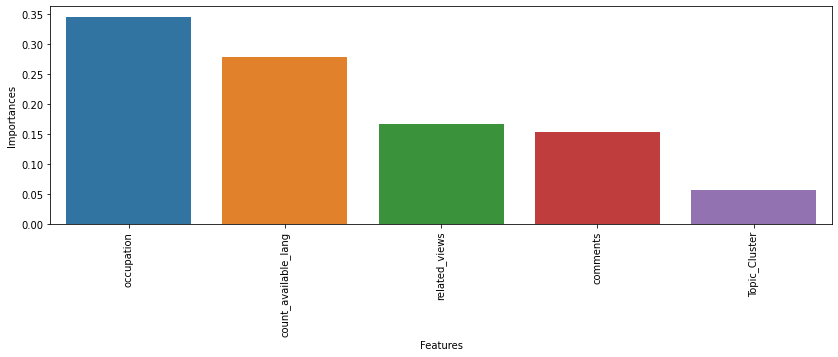

In [781]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model_topics.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
mean_absolute_error(y_test,y_hat_topics)/y.mean()

# Extra Trees Regressor:

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [782]:
#Extra Trees Regressor

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForest
et_model = ExtraTreesRegressor()

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)


et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=6 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=6 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=6 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=6 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=4 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=4 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   0.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=6 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=6 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=6, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=6 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=6, total=   0.1s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=8, total=   0.1s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=8, total=   0.1s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=8 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=8, total=   0.1s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=8, total=   0.1s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=8, total=   0.1s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   0.1s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   0.1s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   0.1s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   0.1s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [783]:
#Building optimal model on the best estimators
et_optimal_model_topics = et_random.best_estimator_

In [784]:
# make predictions for test data
y_et = et_optimal_model_topics.predict(X_test)

In [785]:
print(f'The mean absolute error for Extra Trees is: {mean_absolute_error(y_test,y_et)}')

The mean absolute error for Extra Trees is: 1214624.3804946311


In [786]:
mae=[]

In [788]:
mae.append(mean_absolute_error(y_test,y_hat_topics))

In [789]:
mae.append(mean_absolute_error(y_test,y_et))

#Comparing the scores:

In [790]:
scores= pd.DataFrame({'Model':['XGBoost','ExtraTree'], 'MAE':mae})

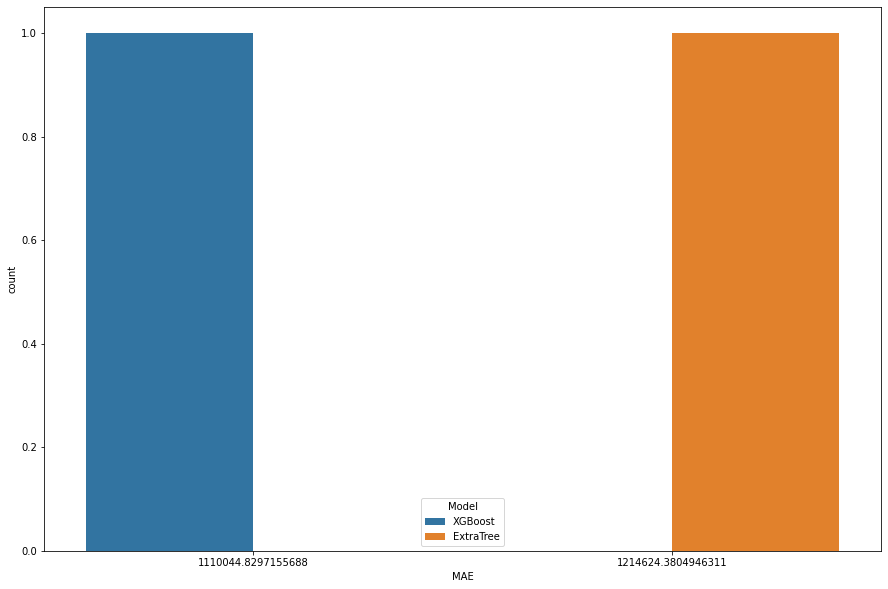

In [791]:
sns.countplot(x=scores['MAE'],hue=scores['Model'])